# Librerías

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Datos simulados

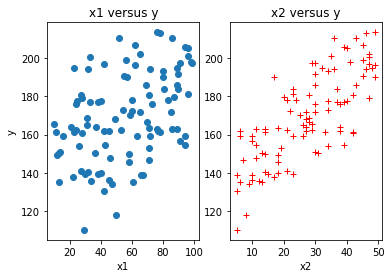

In [2]:
n=100 # numero de observaciones

x1=np.random.randint(10,high=100,size=n) # Variable independiente x1
x2=np.random.randint(5,high=50,size=n) # Variable independiente x2

beta=(100,0.5,1.5) # Coeficientes b0, b1, b2
sigma=10 # Desviación típica del error

err=np.random.randn(n)*sigma # Vector de errores

y=beta[0]+beta[1]*x1+beta[2]*x2+err # Vector de la variable dependiente

X=np.stack((x1,x2),axis=1) # Dataset variables independientes

# Gráfico 
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,y,'o')
ax1.set_title('x1 versus y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax2.plot(x2,y,'r+')
ax2.set_title('x2 versus y')
ax2.set_xlabel('x2')
fig.show()


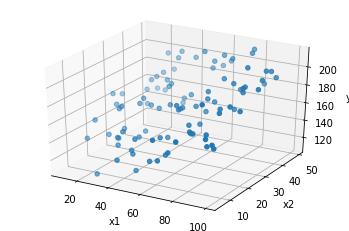

In [3]:
# Grafico 3d

#fig = plt.figure()

ax=plt.axes(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter(x1,x2,y);



# Ajuste del modelo

Beta 0= 105.53 
Beta 1= 0.44 
Beta 2= 1.44 
r^2   = 0.83


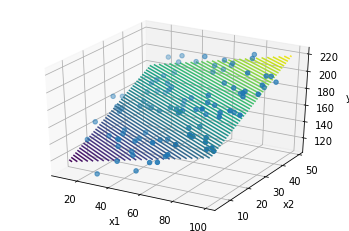

In [4]:

from sklearn.linear_model import LinearRegression

reg =LinearRegression()
reg.fit(X,y) # juste del modelo

b0=round(reg.intercept_,2) # beta 0
b1=round(reg.coef_[0],2) # beta 1
b2=round(reg.coef_[1],2) # beta 2
r2=round(reg.score(X, y),2) # r^2


# Grafico del plano de regresión
x1p=np.linspace(min(x1),max(x1),50)
x2p=np.linspace(min(x2),max(x2),50)
P1, P2 = np.meshgrid(x1p, x2p)
def f(x1, x2):
    return b0+b1*x1+b2*x2
Y = f(P1, P2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(P1, P2, Y, 100)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Gráfico de la nube de puntos
ax.scatter(x1,x2,y);

print('Beta 0=',b0,'\nBeta 1=',b1,'\nBeta 2=',b2,'\nr^2   =',r2)